#### Mariana Quiroga Londono 
#### FBM MNCs 
#### 20210420

In [47]:
#SETTING ENVIRONMENT 

import rpy2
#import tzlocal
#%load_ext rpy2.ipython

import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, dpi_save=1000)

In [48]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

In [49]:
#Read object and metadata
mrna_adata = sc.read("./Simone_data/fbm_mnc_citeseq_rna_pp_clus_20201208.h5ad")
labels = pd.read_csv("./Simone_data/fbm_mnc_meta_with_annot_20201208.csv",index_col="Unnamed: 0")
mrna_adata.obs["cell.labels"] = labels["cell.labels"]
cell_names = [x[:-2] for x in mrna_adata.obs_names]
mrna_adata.obs_names = cell_names
mrna_adata.obs

/usr/local/lib/python3.7/dist-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  FutureWarning,


,souporcell_doublet,souporcell_assignment,orig.ident,lanes,sequencing.type,sex,mad_prd,auto_prd,is_doublet,nUMI,nGene,percent.mito,nUMI_protein,nAb,leiden,__is_in_cluster__,cell.labels
AAACCCAAGAGCATAT,singlet,1,sample_2,SIGAH2_SIGAH12,3prime,male,False,False,False,8763.0,2712,0.013580,414.0,83,10,False,pre B progenitor
AAACCCAAGGACTGGT,singlet,1,sample_2,SIGAH2_SIGAH12,3prime,male,False,False,False,44958.0,4893,0.028739,1452.0,93,1,False,early erythroid
AAACCCAAGGTCATAA,singlet,1,sample_2,SIGAH2_SIGAH12,3prime,male,False,False,False,41561.0,4971,0.021294,1430.0,94,1,False,early erythroid
AAACCCACAAGCGAAC,singlet,1,sample_2,SIGAH2_SIGAH12,3prime,male,False,False,False,14068.0,3244,0.012511,266.0,87,12,False,pre B progenitor
AAACCCACAATCTCTT,singlet,0,sample_1,SIGAH2_SIGAH12,3prime,female,False,False,False,5477.0,2267,0.015154,374.0,81,18,False,pre pro B progenitor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGCAGTCAGCC,singlet,1,sample_2,SIGAH2_SIGAH12,3prime,male,False,False,False,17406.0,3492,0.019419,968.0,136,9,False,MOP
TTTGTTGCATCCTAAG,singlet,1,sample_2,SIGAH2_SIGAH12,3prime,male,False,False,False,21899.0,4560,0.037216,1040.0,139,7,False,promonocyte
TTTGTTGCATGAGATA,singlet,1,sample_2,SIGAH2_SIGAH12,3prime,male,False,False,False,16615.0,2236,0.007704,272.0,76,19,False,mid erythroid
TTTGTTGTCAAATGAG,singlet,1,sample_2,SIGAH2_SIGAH12,3prime,male,False,False,False,10972.0,2582,0.033722,430.0,109,0,False,CD14 monocyte


... storing 'cell.labels' as categorical


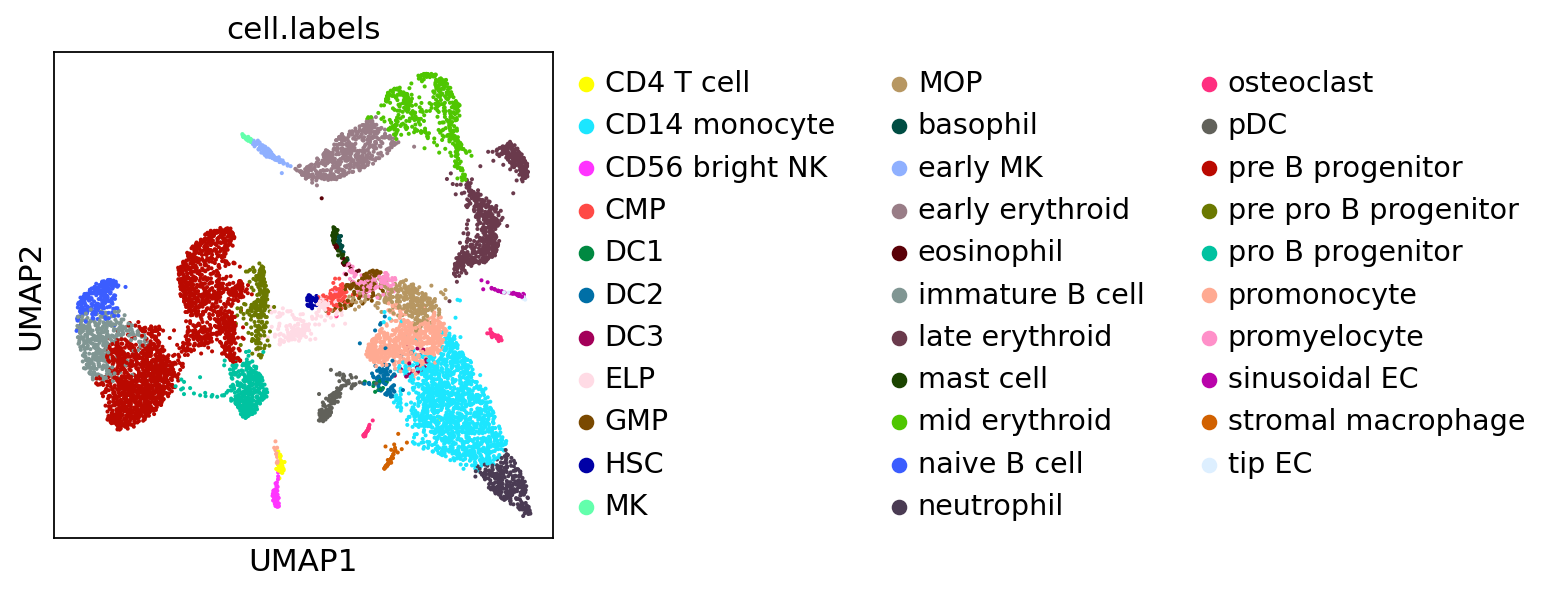

In [50]:
sc.pl.umap(mrna_adata,color=["cell.labels"], ncols=5, cmap=cmap)

In [51]:
mrna_adata

AnnData object with n_obs × n_vars = 8986 × 36601
    obs: 'souporcell_doublet', 'souporcell_assignment', 'orig.ident', 'lanes', 'sequencing.type', 'sex', 'mad_prd', 'auto_prd', 'is_doublet', 'nUMI', 'nGene', 'percent.mito', 'nUMI_protein', 'nAb', 'leiden', '__is_in_cluster__', 'cell.labels'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'orig.ident_colors', 'pca', 'rank_genes_groups', 'rank_genes_groups_filtered', 'cell.labels_colors'
    obsm: 'X_orig_pca', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [52]:
DSB_output0=sc.read("010221_mq224_postQC_postDSB_postUMAP_celllabels_MNCs_ADTonmRNA_xSimone.h5ad")

In [54]:
#adapt the order for figures in both protein and mrna datasets
DSB_output0.obs['cell.labels.sorted'] = DSB_output0.obs['cell.labels'].cat.reorder_categories(cells_order)
mrna_adata.obs['cell.labels.sorted'] = mrna_adata.obs['cell.labels'].cat.reorder_categories(cells_order)

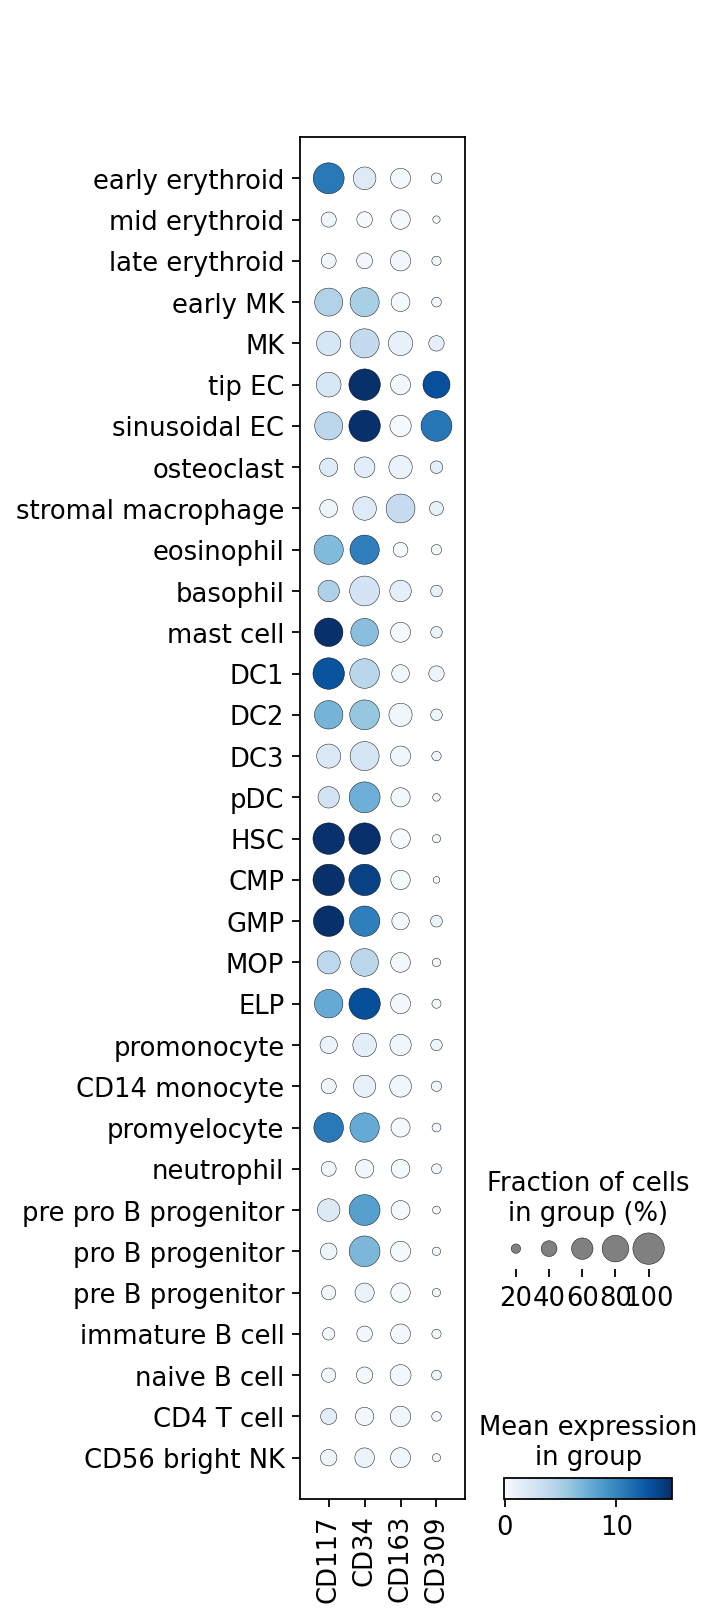

In [60]:
sc.pl.dotplot(DSB_output0, var_names=["CD117", "CD34", "CD163", "CD309"], groupby="cell.labels.sorted",cmap="Blues", vmax=15, save="20210420_Fig_ADT_MNCs_FBM_dotplot_selectedmarkers.pdf")

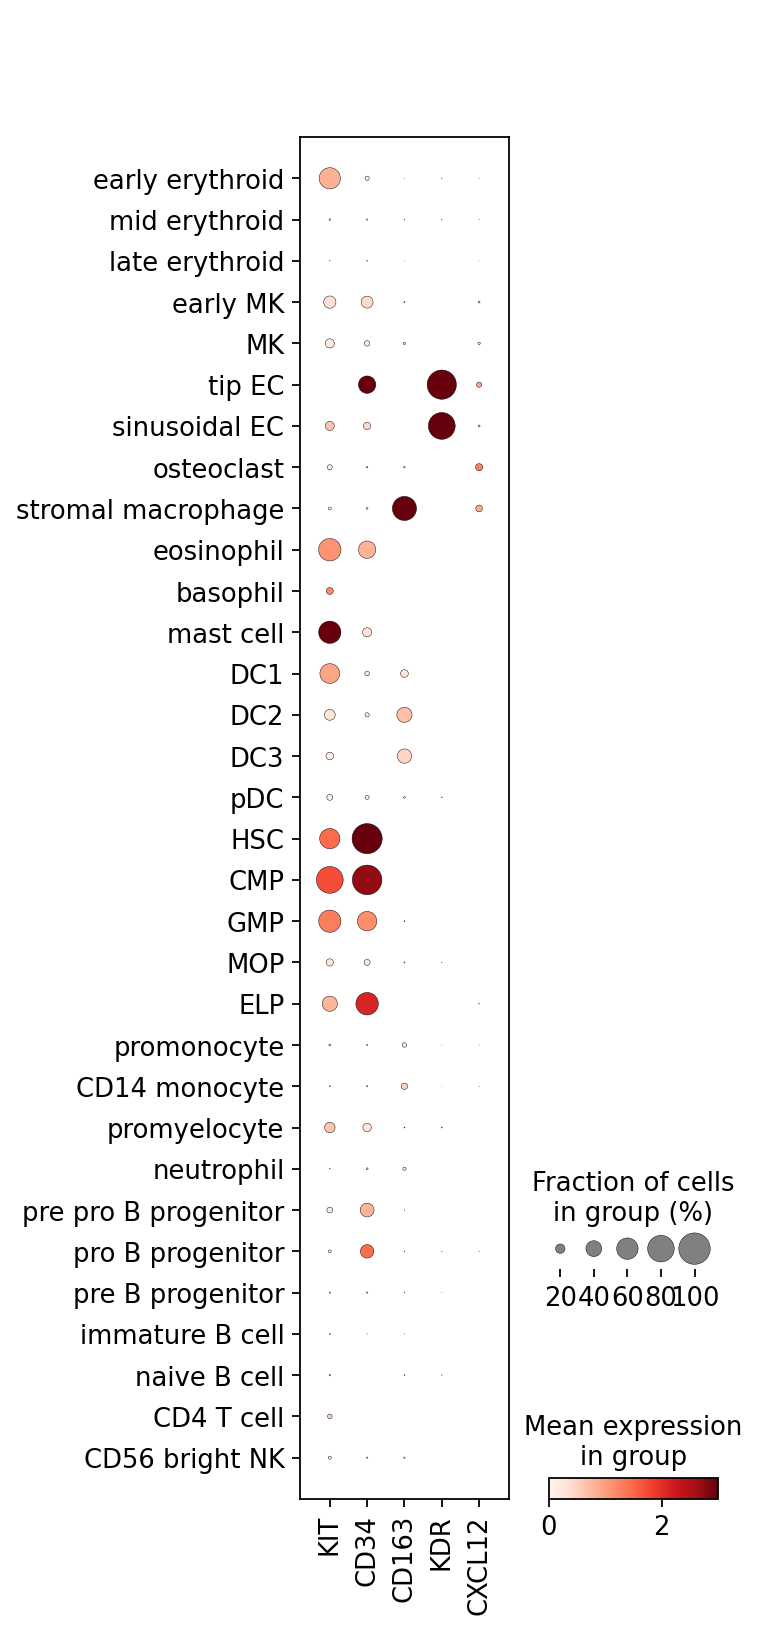

In [65]:
sc.pl.dotplot(mrna_adata, var_names=["KIT", "CD34", "CD163", "KDR", "CXCL12"], groupby="cell.labels.sorted",cmap="Reds", vmax=3, save="20210420_Fig_mRNA_MNCs_FBM_dotplot_selectedmarkers.pdf")